<a href="https://colab.research.google.com/github/hrush25/IPL_score_prediction/blob/final-model-ann/final-model-ann.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn import preprocessing

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
dataset = pd.read_csv('/content/drive/MyDrive/Datasets/0y clean data pre ipl.csv') 


In [ ]:
import xgboost as xgb
#the outcome (dependent variable) has only a limited number of possible values. 
#Logistic Regression is used when response variable is categorical in nature.
from sklearn.linear_model import LogisticRegression
#A random forest is a meta estimator that fits a number of decision tree classifiers 
#on various sub-samples of the dataset and use averaging to improve the predictive 
#accuracy and control over-fitting.
from sklearn.ensemble import RandomForestClassifier
#a discriminative classifier formally defined by a separating hyperplane.
from sklearn.svm import SVC

In [ ]:
dataset.head(2)

,Unnamed: 0,match_id,venue,innings,ball,batting_team,bowling_team,striker,non_striker,bowler,runs_off_bat,extras,wicket_type,player_dismissed,run,wickets,truns,y
0,0,335982,M Chinnaswamy Stadium,1,0.1,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,BB McCullum,P Kumar,0.0,1.0,,,1.0,0.0,1.0,68.0
1,1,335982,M Chinnaswamy Stadium,1,0.2,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,SC Ganguly,P Kumar,0.0,0.0,,,0.0,0.0,1.0,68.0


In [ ]:
dataset= dataset.drop(['Unnamed: 0','extras','match_id', 'runs_off_bat'],axis = 1)
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32178 entries, 0 to 32177
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   venue             32178 non-null  object 
 1   innings           32178 non-null  int64  
 2   ball              32178 non-null  float64
 3   batting_team      32178 non-null  object 
 4   bowling_team      32178 non-null  object 
 5   striker           32178 non-null  object 
 6   non_striker       32178 non-null  object 
 7   bowler            32178 non-null  object 
 8   wicket_type       32178 non-null  object 
 9   player_dismissed  32178 non-null  object 
 10  run               32178 non-null  float64
 11  wickets           32178 non-null  float64
 12  truns             32178 non-null  float64
 13  y                 32178 non-null  float64
dtypes: float64(5), int64(1), object(8)
memory usage: 3.4+ MB


In [ ]:
a1 = dataset['venue'].unique()
a2 = dataset['batting_team'].unique()
a3 = dataset['bowling_team'].unique()
a4 = dataset['striker'].unique()
a5 = dataset['bowler'].unique()

In [ ]:
def labelEncoding(data):
    dataset = pd.DataFrame(data)
    feature_dict ={}
    #features={}
    for feature in dataset:
        if dataset[feature].dtype==object:
            le = preprocessing.LabelEncoder()
            fs = dataset[feature].unique()
            le.fit(fs)
            dataset[feature] = le.transform(dataset[feature])
            feature_dict[feature] = le
            print(feature)
    return dataset

labelEncoding(dataset)

venue
batting_team
bowling_team
striker
non_striker
bowler
wicket_type
player_dismissed


,venue,innings,ball,batting_team,bowling_team,striker,non_striker,bowler,wicket_type,player_dismissed,run,wickets,truns,y
0,15,1,0.1,7,13,186,30,201,0,0,1.0,0.0,1.0,68.0
1,15,1,0.2,7,13,30,184,201,0,0,0.0,0.0,1.0,68.0
2,15,1,0.3,7,13,30,184,201,0,0,1.0,0.0,2.0,68.0
3,15,1,0.4,7,13,30,184,201,0,0,0.0,0.0,2.0,68.0
4,15,1,0.5,7,13,30,184,201,0,0,0.0,0.0,2.0,68.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32173,31,1,6.2,14,10,48,126,220,0,0,1.0,1.0,53.0,57.0
32174,31,1,6.3,14,10,127,47,220,0,0,1.0,1.0,54.0,57.0
32175,31,1,6.4,14,10,48,126,220,0,0,1.0,1.0,55.0,57.0
32176,31,1,6.5,14,10,127,47,220,0,0,1.0,1.0,56.0,57.0


In [ ]:
ip_dataset = dataset[['venue','innings', 'batting_team', 'bowling_team', 'striker', 'non_striker', 'bowler']]
b1 = ip_dataset['venue'].unique()
b2 = ip_dataset['batting_team'].unique()
b3 = ip_dataset['bowling_team'].unique()
b4 = ip_dataset['striker'].unique()
b5 = ip_dataset['bowler'].unique()
#ip_dataset.head(2)

In [ ]:
from pandas.plotting import scatter_matrix

/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/misc.py:80: UserWarning: Attempting to set identical left == right == 1.0 results in singular transformations; automatically expanding.
  ax.set_xlim(boundaries_list[j])
/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/misc.py:81: UserWarning: Attempting to set identical bottom == top == 1.0 results in singular transformations; automatically expanding.
  ax.set_ylim(boundaries_list[i])
/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/misc.py:71: UserWarning: Attempting to set identical left == right == 1.0 results in singular transformations; automatically expanding.
  ax.set_xlim(boundaries_list[i])


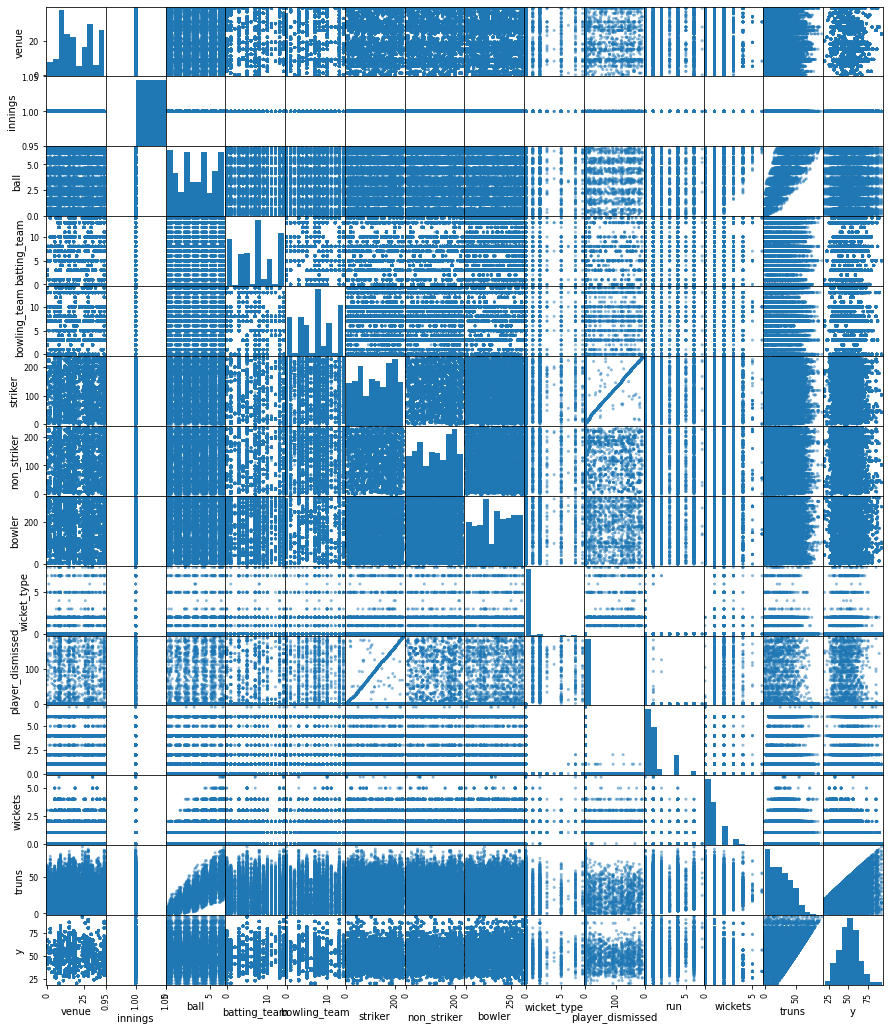

In [ ]:
scatter_matrix(dataset,figsize=(15,18));

In [ ]:
ip_dataset.drop('non_striker',axis=1,inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
X= ip_dataset.iloc[:,]
y = dataset.y

In [ ]:
dataset = dataset.drop('y',axis = 1)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 0)

In [ ]:
X_test.shape

(9654, 6)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
from time import time 
# F1 score (also F-score or F-measure) is a measure of a test's accuracy. 
#It considers both the precision p and the recall r of the test to compute 
#the score: p is the number of correct positive results divided by the number of 
#all positive results, and r is the number of correct positive results divided by 
#the number of positive results that should have been returned. The F1 score can be 
#interpreted as a weighted average of the precision and recall, where an F1 score 
#reaches its best value at 1 and worst at 0.
from sklearn.metrics import f1_score

def train_classifier(clf, X_train, y_train):
    ''' Fits a classifier to the training data. '''
    
    # Start the clock, train the classifier, then stop the clock
    start = time()
    clf.fit(X_train, y_train)
    end = time()
    
    # Print the results
    print("Trained model in {:.4f} seconds".format(end - start))

    
def predict_labels(clf, features, target):
    ''' Makes predictions using a fit classifier based on F1 score. '''
    
    # Start the clock, make predictions, then stop the clock
    start = time()
    y_pred = clf.predict(features)
    
    end = time()
    # Print and return results
    print("Made predictions in {:.4f} seconds.".format(end - start))
    
    return f1_score(target, y_pred, pos_label='H',average='micro)
    # , sum(target == y_pred) / float(len(y_pred))


def train_predict(clf, X_train, y_train, X_test, y_test):
    ''' Train and predict using a classifer based on F1 score. '''
    
    # Indicate the classifier and the training set size
    print("Training a {} using a training set size of {}. . .".format(clf.__class__.__name__, len(X_train)))
    
    # Train the classifier
    train_classifier(clf, X_train, y_train)
    
    # Print the results of prediction for both training and testing
    f1, acc = predict_labels(clf, X_train, y_train)
    print( f1, acc)
    print("F1 score and accuracy score for training set: {:.4f} , {:.4f}.".format(f1 , acc))
    
    f1, acc = predict_labels(clf, X_test, y_test)
    print("F1 score and accuracy score for test set: {:.4f} , {:.4f}.".format(f1 , acc))

SyntaxError: ignored

In [ ]:
# Initialize the three models (XGBoost is initialized later)
clf_A = LogisticRegression(random_state = 42)
clf_B = SVC(random_state = 912, kernel='rbf')
#Boosting refers to this general problem of producing a very accurate prediction rule 
#by combining rough and moderately inaccurate rules-of-thumb
clf_C = xgb.XGBClassifier(seed = 82)

# train_predict(clf_A, X_train, y_train, X_test, y_test)
# print ()
# train_predict(clf_B, X_train, y_train, X_test, y_test)
# print ()
train_predict(clf_C, X_train, y_train, X_test, y_test)
# print ()

Training a XGBClassifier using a training set size of 22524. . .
Trained model in 48.1369 seconds
Made predictions in 19.8769 seconds.


ValueError: ignored

# ANN

In [ ]:
Y_train= y_train
Y_test =y_test

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 64)                448       
_________________________________________________________________
dense_13 (Dense)             (None, 128)               8320      
_________________________________________________________________
dense_14 (Dense)             (None, 256)               33024     
_________________________________________________________________
dense_15 (Dense)             (None, 1)                 257       
Total params: 42,049
Trainable params: 42,049
Non-trainable params: 0
_________________________________________________________________
Epoch 1/400
479/479 [==============================] - 2s 2ms/step - loss: 525.7150 - mean_squared_error: 525.7150 - mean_absolute_error: 17.0206 - val_loss: 165.4742 - val_mean_squared_error: 165.4742 - val_mean_absolute_error: 10.3037
Epoch 2/400

0.7544601358878108

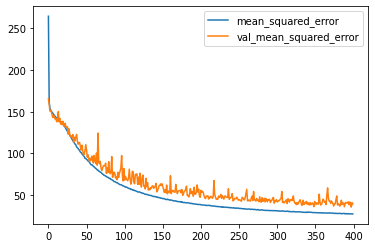

In [ ]:

# keras API uses Tensorflow as backend in Deep Learning
from keras.layers import Dense
# Feed Foreward NN
from keras.models import Sequential
# Model Optimizer - RMSProp
from keras.optimizers import RMSprop

# Feedforeward Dense Neural Network
def build_model():
    model = Sequential()
    # Input Layer - I - Take values of neurons as (2)pow n form.
    model.add(Dense(units = 64, activation='relu', input_shape = [len(X.keys())]))
    # Hidden Layer - I
    model.add(Dense(units = 128, activation='relu'))
    # Hidden Layer - II
    model.add(Dense(units = 256, activation='relu'))
    # Output Layer 
    model.add(Dense(units = 1))

    # Optimizers - RMSProp
    # Alpha = Learning rate (< 1)
    optimizers = RMSprop(learning_rate= 0.001)

    # Regression : Loss function - 'mean_squared_error'
    model.compile(loss = 'mean_squared_error', optimizer = optimizers, metrics = ['mean_squared_error', 
                                                                                  'mean_absolute_error'])
    
    return model

model = build_model()

model.summary()

# epochs = Number of Iterations
# Batch size = 20, A small sample / batch sample taken for iterations in each epoch 
# validation_splot = 15% of samples of overall data from training dataset for validation of model in each epoch 
history = model.fit(X_train, Y_train, epochs = 400, batch_size=40, validation_split = 0.15)

pd.DataFrame(history.history)

pd.DataFrame(history.history)[['mean_squared_error','val_mean_squared_error']].plot()

# Evaluate - Model Metrics 
model.evaluate(X_test, Y_test)

prediction = model.predict(X_test)

from sklearn.metrics import r2_score
r2_score(Y_test, prediction)